(28, 28)
784
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 88us/step - loss: 6.6789 - accuracy: 0.8733 - val_loss: 0.8474 - val_accuracy: 0.9232
Epoch 2/10
60000/60000 [==============================] - 5s 85us/step - loss: 0.4288 - accuracy: 0.9458 - val_loss: 0.3660 - val_accuracy: 0.9483
Epoch 3/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.2469 - accuracy: 0.9611 - val_loss: 0.3931 - val_accuracy: 0.9402
Epoch 4/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.2063 - accuracy: 0.9665 - val_loss: 0.3363 - val_accuracy: 0.9471
Epoch 5/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.1823 - accuracy: 0.9706 - val_loss: 0.3896 - val_accuracy: 0.9521
Epoch 6/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.1563 - accuracy: 0.9751 - val_loss: 0.3631 - val_accuracy: 0.9615
Epoch 7/10
60000/60000 [==============================]

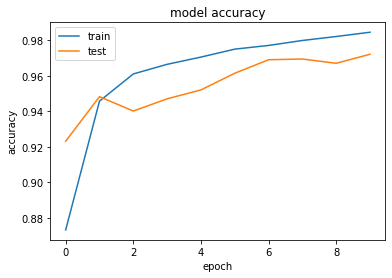

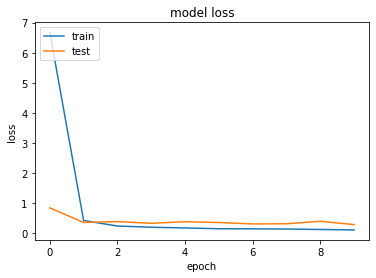

The prediction of the 20th in the test dataset is:  [9]


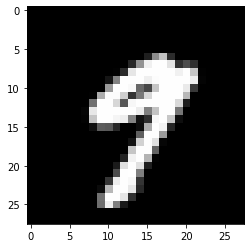

In [17]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

print(train_images.shape[1:])
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')

#scale data
#train_data /=255.0 without scaling
#test_data /=255.0

#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
#model.add(Dense(512, activation='sigmoid')) adding additional hidden layers
#model.add(Dense(512, activation='tanh'))
#model.add(Dense(512, activation='sigmoid'))
#model.add(Dense(512, activation='tanh'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

# Accuracy
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# prediction of the model on the 20th image in the test data
predict_test = model.predict_classes(test_data[[20], :])
print("The prediction of the 20th in the test dataset is: ", predict_test)
plt.imshow(test_images[20,:,:],cmap='gray')
plt.show()